In [1]:
#ALUMNO: JUAN DIEGO POZO ORTIZ 
#CÓDIGO: 20210679

In [2]:
import os


import geopandas as gpd
from  fiona import listlayers

#maps
thailandMaps='https://github.com/juandiegopozo-10/tareadatos3/raw/main/maps2/thailandMaps_4239.gpkg'

#layers in maps
listlayers(thailandMaps)

['country', 'cities', 'rivers']

In [3]:
thailand=gpd.read_file(thailandMaps,layer='country')
thailand_cities=gpd.read_file(thailandMaps,layer='cities')
thailand_rivers=gpd.read_file(thailandMaps,layer='rivers')

In [4]:
thailand.crs.to_epsg()==thailand_cities.crs.to_epsg()==thailand_rivers.crs.to_epsg()

True

<Axes: >

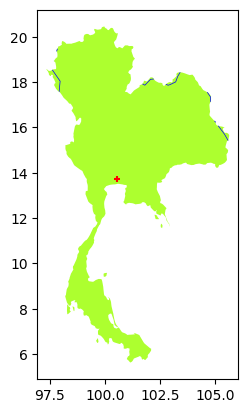

In [5]:
# plotting
base = thailand.plot(facecolor="greenyellow")
thailand_rivers.plot(edgecolor='blue', linewidth=0.5,ax=base)
thailand_cities.plot(marker='+', color='red', markersize=15,ax=base)

In [6]:
thailand

COUNTRY                                           geometry
0  Thailand  MULTIPOLYGON (((102.91972 11.63392, 102.91249 ...

In [7]:
thailand.boundary

0    MULTILINESTRING ((102.91972 11.63392, 102.9124...
dtype: geometry

<Axes: >

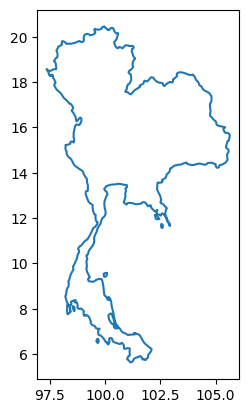

In [8]:
thailand.boundary.plot()

In [9]:
type(thailand.boundary)

geopandas.geoseries.GeoSeries

In [10]:
# converting into GDF
thailand.boundary.to_frame()

0
0  MULTILINESTRING ((102.91972 11.63392, 102.9124...

In [11]:
# conversion
thailand_border=thailand.boundary.to_frame()

# new column (optional)
thailand_border['name']='Thailand'

# renaming the geometry column
thailand_border.rename(columns={0:'geometry'},inplace=True)

#setting the geometry (the name is not enough)
thailand_border = thailand_border.set_geometry("geometry")

# verifying:
thailand_border.crs

<Geographic 2D CRS: EPSG:4239>
Name: Indian 1954
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Myanmar (Burma) - onshore; Thailand - onshore.
- bounds: (92.2, 5.63, 105.64, 28.55)
Datum: Indian 1954
- Ellipsoid: Everest 1830 (1937 Adjustment)
- Prime Meridian: Greenwich

In [12]:
thailand_border

geometry      name
0  MULTILINESTRING ((102.91972 11.63392, 102.9124...  Thailand

In [83]:
thailand_states=gpd.read_file(os.path.join("maps2","tha_adm_ibge_2020_shp","tha_admbnda_adm1_rtsd_20220121.shp"))
thailand_municipalities=gpd.read_file(os.path.join("maps2","tha_adm_ibge_2020_shp","tha_admbnda_adm2_rtsd_20220121.shp"))

In [86]:
thailand_states.crs, thailand_municipalities.crs

(<Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich,
 <Geographic 2D CRS: EPSG:4326>
 Name: WGS 84
 Axis Info [ellipsoidal]:
 - Lat[north]: Geodetic latitude (degree)
 - Lon[east]: Geodetic longitude (degree)
 Area of Use:
 - name: World.
 - bounds: (-180.0, -90.0, 180.0, 90.0)
 Datum: World Geodetic System 1984 ensemble
 - Ellipsoid: WGS 84
 - Prime Meridian: Greenwich)

<Axes: >

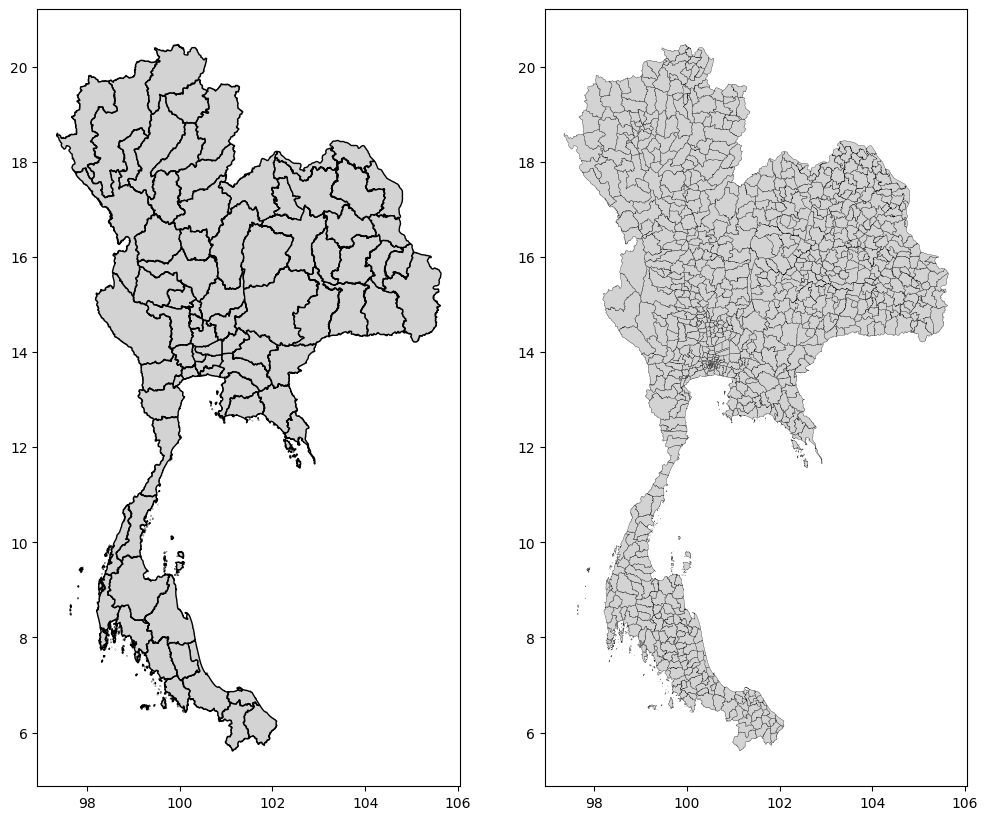

In [87]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, sharex=False, sharey=False, figsize=(12,12))

thailand_states.plot(ax=ax1, facecolor='lightgrey', edgecolor='black')
thailand_municipalities.plot(ax=ax2, facecolor='lightgrey', edgecolor='black',linewidth=0.2)


In [16]:
import pandas as pd
infoairports=pd.read_csv(os.path.join("data","th-airports.csv"))

# see

infoairports

id        ident                 type  \
0    #meta +id  #meta +code  #loc +airport +type   
1        28118         VTBS        large_airport   
2        26638         VTBD        large_airport   
3        26674         VTSP        large_airport   
4        26647         VTCC        large_airport   
..         ...          ...                  ...   
109      26646         VTBW        small_airport   
110     504798      TH-0041             heliport   
111     339964      TH-0009             heliport   
112     356370      TH-0031               closed   
113     339975      TH-0020             heliport   

                                 name        latitude_deg       longitude_deg  \
0                 #loc +airport +name           #geo +lat           #geo +lon   
1                Suvarnabhumi Airport  13.681099891662598  100.74700164794922   
2    Don Mueang International Airport       13.9125995636       100.607002258   
3        Phuket International Airport              8.1132           98.316902   
4    Chiang Mai International Airport  18.766799926799997        98.962600708   
..                                ...                 ...                 ...   
109           Watthana Nakhon Airport           13.769203          102.316017   
110                  Skydance Helipad              8.0779             98.3017   
111          Khao Khitchakut Heliport           12.836021          102.168767   
112               Ko Pha-ngan Airport            9.741118          100.070686   
113               Khuan Timun Helipad             6.83411           101.02211   

            elevation_ft                 continent    country_name  \
0    #geo +elevation +ft  #region +continent +code  #country +name   
1                      5                        AS        Thailand   
2                      9                        AS        Thailand   
3                     82                        AS        Thailand   
4                   1036                        AS        Thailand   
..                   ...                       ...             ...   
109                  200                        AS        Thailand   
110                  NaN                        AS        Thailand   
111                  NaN                        AS        Thailand   
112                  900                        AS        Thailand   
113                  NaN                        AS        Thailand   

              iso_country  ...              municipality   scheduled_service  \
0    #country +code +iso2  ...  #loc +municipality +name  #status +scheduled   
1                      TH  ...                   Bangkok                   1   
2                      TH  ...                   Bangkok                   1   
3                      TH  ...                    Phuket                   1   
4                      TH  ...                Chiang Mai                   1   
..                    ...  ...                       ...                 ...   
109                    TH  ...           Watthana Nakhon                   0   
110                    TH  ...                       NaN                   0   
111                    TH  ...           Khao Khitchakut                   0   
112                    TH  ...           Pha-ngan Island                   0   
113                    TH  ...                    Thepha                   0   

                     gps_code                  iata_code  \
0    #loc +airport +code +gps  #loc +airport +code +iata   
1                        VTBS                        BKK   
2                        VTBD                        DMK   
3                        VTSP                        HKT   
4                        VTCC                        CNX   
..                        ...                        ...   
109                      VTBW                        NaN   
110                       NaN                        NaN   
111                       NaN                        NaN   
112         

In [ ]:
#Ejercicios 2

In [17]:
infoairports.drop(index=0,inplace=True)
infoairports.reset_index(drop=True, inplace=True)

# keep the  columns needed
keep=['name','type','latitude_deg', 'longitude_deg','elevation_ft','region_name','municipality']
infoairports=infoairports.loc[:,keep]
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           113 non-null    object
 1   type           113 non-null    object
 2   latitude_deg   113 non-null    object
 3   longitude_deg  113 non-null    object
 4   elevation_ft   73 non-null     object
 5   region_name    113 non-null    object
 6   municipality   84 non-null     object
dtypes: object(7)
memory usage: 6.3+ KB


In [18]:
numericCols=['latitude_deg', 'longitude_deg','elevation_ft']
infoairports[numericCols]=infoairports.loc[:,numericCols].apply(lambda x:pd.to_numeric(x))

# now
infoairports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           113 non-null    object 
 1   type           113 non-null    object 
 2   latitude_deg   113 non-null    float64
 3   longitude_deg  113 non-null    float64
 4   elevation_ft   73 non-null     float64
 5   region_name    113 non-null    object 
 6   municipality   84 non-null     object 
dtypes: float64(3), object(4)
memory usage: 6.3+ KB


<Axes: xlabel='longitude_deg', ylabel='latitude_deg'>

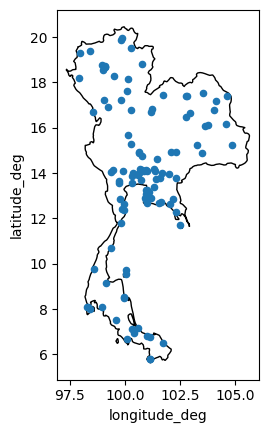

In [19]:
base = thailand.plot(color='white', edgecolor='black') #unprojected

infoairports.plot.scatter(x = 'longitude_deg', y = 'latitude_deg',ax=base)

In [20]:
airports=gpd.GeoDataFrame(data=infoairports.copy(),
                 geometry=gpd.points_from_xy(infoairports.longitude_deg,
                                             infoairports.latitude_deg),
                 crs=4326)# the coordinates were in degrees - unprojected

In [21]:
airports=airports.to_crs(4239)

<Axes: >

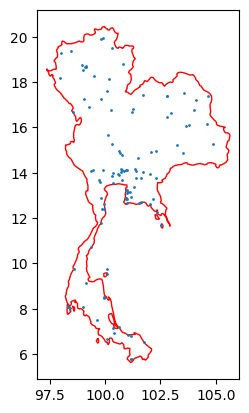

In [22]:

base = thailand.plot(color='white', edgecolor='red')
airports.plot(ax=base,markersize=1)

In [23]:
type(airports), type(infoairports)

(geopandas.geodataframe.GeoDataFrame, pandas.core.frame.DataFrame)

In [24]:
airports['type'].value_counts()

type
small_airport     65
medium_airport    39
large_airport      4
heliport           3
closed             2
Name: count, dtype: int64

In [25]:
airports.rename(columns={'type':'kind'},inplace=True)

In [26]:
from folium import LayerControl

m = airports[airports.kind=='small_airport'].explore(color="red",name="small",show=False)
m = airports[airports.kind=='medium_airport'].explore(m=m, color="blue",name="medium",show=False)
m = airports[airports.kind=='large_airport'].explore(m=m, color="black",name="large",show=True)
m = airports[airports.kind=='closed'].explore(m=m, color="white",name="closed",show=False)
m = airports[airports.kind=='heliport'].explore(m=m, color="orange",name="heliport",show=False)

LayerControl(collapsed=False).add_to(m) #optional

m

In [27]:
centroThailand=thailand.centroid
centroThailand


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_4328\1009624676.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroThailand=thailand.centroid


0    POINT (101.02088 15.12572)
dtype: geometry

In [28]:
type(centroThailand), type(centroThailand.x)

(geopandas.geoseries.GeoSeries, pandas.core.series.Series)

In [29]:
type(centroThailand.x[0]),type(centroThailand.y[0])

(numpy.float64, numpy.float64)

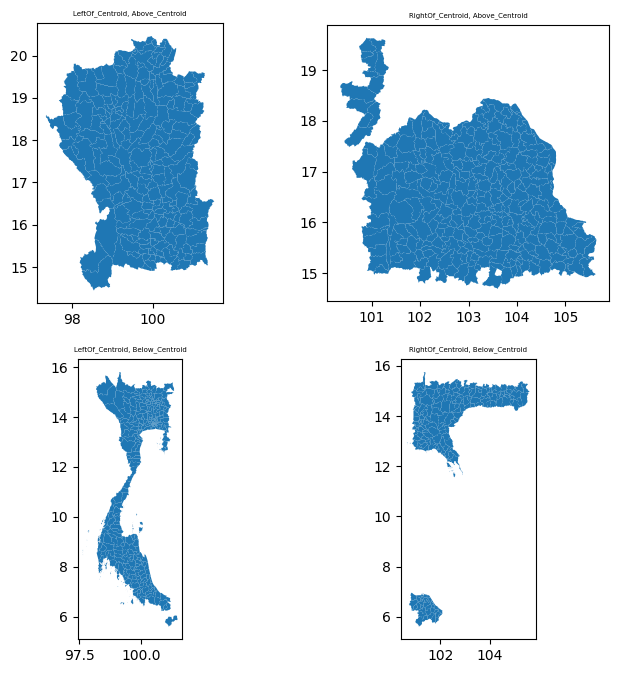

In [37]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=False, sharey=False,figsize=(8,8))
#!pip install matplotlib
centroidX= centroThailand.x[0]
centroidY= centroThailand.y[0]

axs[0,0].set_title('LeftOf_Centroid, Above_Centroid',fontsize=5)
thailand_municipalities.cx[:centroidX,centroidY:].plot(ax=axs[0,0])

axs[0,1].set_title('RightOf_Centroid, Above_Centroid',fontsize=5)
thailand_municipalities.cx[centroidX:,centroidY:].plot(ax=axs[0,1])

axs[1,0].set_title('LeftOf_Centroid, Below_Centroid',fontsize=5)
thailand_municipalities.cx[:centroidX,:centroidY].plot(ax=axs[1,0])

axs[1,1].set_title('RightOf_Centroid, Below_Centroid',fontsize=5)
thailand_municipalities.cx[centroidX:,:centroidY].plot(ax=axs[1,1]) ;

In [38]:
thailand_municipalities.cx[:centroidX,centroidY:]

Shape_Leng  Shape_Area         ADM2_EN     ADM2_TH ADM2_PCODE ADM2_REF  \
94     1.368328    0.059120    Khok Samrong    โคกสำโรง     TH1603     None   
95     2.193531    0.094896      Chai Badan    ชัยบาดาล     TH1604     None   
97     1.228094    0.045941          Ban Mi    บ้านหมี่     TH1606     None   
99     0.883330    0.028141          Sa Bot    สระโบสถ์     TH1608     None   
100    1.272993    0.044740    Khok Charoen    โคกเจริญ     TH1609     None   
..          ...         ...             ...         ...        ...      ...   
711    2.064146    0.062883  Bueng Sam Phan   บึงสามพัน     TH6708     None   
713    1.200706    0.041513       Wang Pong     วังโป่ง     TH6710     None   
714    2.089183    0.069426        Khao Kho      เขาค้อ     TH6711     None   
731    3.943181    0.325584  Thong Pha Phum   ทองผาภูมิ     TH7107     None   
732    3.525723    0.269553   Sangkhla Buri  สังขละบุรี     TH7108     None   

    ADM2ALT1EN ADM2ALT2EN ADM2ALT1TH ADM2ALT2TH       ADM1_EN    ADM1_TH  \
94        None       None       None       None      Lop Buri     ลพบุรี   
95        None       None       None       None      Lop Buri     ลพบุรี   
97        None       None       None       None      Lop Buri     ลพบุรี   
99        None       None       None       None      Lop Buri     ลพบุรี   
100       None       None       None       None      Lop Buri     ลพบุรี   
..         ...        ...        ...        ...           ...        ...   
711       None       None       None       None    Phetchabun  เพชรบูรณ์   
713       None       None       None       None    Phetchabun  เพชรบูรณ์   
714       None       None       None       None    Phetchabun  เพชรบูรณ์   
731       None       None       None       None  Kanchanaburi  กาญจนบุรี   
732       None       None       None       None  Kanchanaburi  กาญจนบุรี   

    ADM1_PCODE   ADM0_EN    ADM0_TH ADM0_PCODE        date     validOn  \
94        TH16  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
95        TH16  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
97        TH16  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
99        TH16  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
100       TH16  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
..         ...       ...        ...        ...         ...         ...   
711       TH67  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
713       TH67  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
714       TH67  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
731       TH71  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
732       TH71  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   

    validTo                                           geometry  
94     None  POLYGON ((100.74489 15.18709, 100.74494 15.186...  
95     None  POLYGON ((101.29829 15.37982, 101.29842 15.379...  
97     None  POLYGON ((100.59155 15.24736, 100.59176 15.247...  
99     None  POLYGON ((100.82897 15.32779, 100.83079 15.326...  
100    None  POLYGON ((100.83928 15.56277, 100.83929 15.562...  
..      ...                                                ...  
711    None  POLYGON ((101.31174 15.94444, 101.31182 15.944...  
713    None  POLYGON ((100.79918 16.45100, 100.80015 16.450...  
714    None  POLYGON ((101.05829 16.90725, 101.06101 16.906...  
731    None  POLYGON ((98.88756 15.27511, 98.88780 15.27509...  
732    None  POLYGON ((98.58631 15.65465, 98.58662 15.65384...  

[208 rows x 20 columns]

In [39]:
thailand_municipalities.cx[:centroidX,centroidY:].dissolve()

geometry  Shape_Leng  Shape_Area  \
0  POLYGON ((98.99968 15.06963, 98.99987 15.06909...    1.368328     0.05912   

        ADM2_EN   ADM2_TH ADM2_PCODE ADM2_REF ADM2ALT1EN ADM2ALT2EN  \
0  Khok Samrong  โคกสำโรง     TH1603     None       None       None   

  ADM2ALT1TH ADM2ALT2TH   ADM1_EN ADM1_TH ADM1_PCODE   ADM0_EN    ADM0_TH  \
0       None       None  Lop Buri  ลพบุรี       TH16  Thailand  ประเทศไทย   

  ADM0_PCODE        date     validOn validTo  
0         TH  2019-02-18  2022-01-22    None

<Axes: >

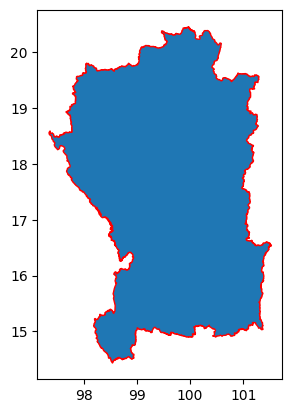

In [40]:
thailand_municipalities.cx[:centroidX,centroidY:].dissolve().plot(edgecolor='red')

<Axes: >

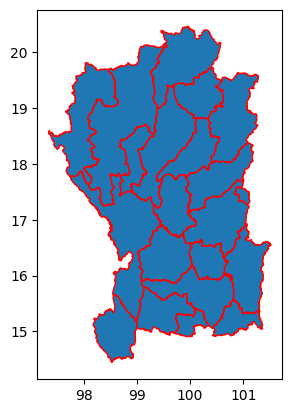

In [42]:
thailand_municipalities.cx[:centroidX,centroidY:].dissolve(by='ADM1_TH').plot(edgecolor='red')

In [43]:
thailand_municipalities.cx[:centroidX,centroidY:].unary_union

In [44]:
type(thailand_municipalities.cx[:centroidX,centroidY:].unary_union)

shapely.geometry.polygon.Polygon

In [45]:
gpd.GeoDataFrame(index=[0],
                 crs=thailand_municipalities.crs,
                 geometry=[thailand_municipalities.cx[:centroidX,centroidY:].unary_union])

geometry
0  POLYGON ((98.99968 15.06963, 98.99987 15.06909...

In [46]:
# you create
Thailand_topLeft=thailand_municipalities.cx[:centroidX,centroidY:].dissolve()
# you get
Thailand_topLeft

geometry  Shape_Leng  Shape_Area  \
0  POLYGON ((98.99968 15.06963, 98.99987 15.06909...    1.368328     0.05912   

        ADM2_EN   ADM2_TH ADM2_PCODE ADM2_REF ADM2ALT1EN ADM2ALT2EN  \
0  Khok Samrong  โคกสำโรง     TH1603     None       None       None   

  ADM2ALT1TH ADM2ALT2TH   ADM1_EN ADM1_TH ADM1_PCODE   ADM0_EN    ADM0_TH  \
0       None       None  Lop Buri  ลพบุรี       TH16  Thailand  ประเทศไทย   

  ADM0_PCODE        date     validOn validTo  
0         TH  2019-02-18  2022-01-22    None

In [47]:
Thailand_topLeft['zone']='NW' # add column
Thailand_topLeft=Thailand_topLeft.loc[:,['ADM0_EN','zone','geometry']]   # keep some

# result
Thailand_topLeft

ADM0_EN zone                                           geometry
0  Thailand   NW  POLYGON ((98.99968 15.06963, 98.99987 15.06909...

In [48]:
Thailand_topRight=thailand_municipalities.cx[centroidX:,centroidY:].dissolve()
Thailand_bottomLeft=thailand_municipalities.cx[:centroidX,:centroidY].dissolve()
Thailand_bottomRight=thailand_municipalities.cx[centroidX:,:centroidY].dissolve()

Thailand_topRight['zone']='NE'
Thailand_topRight=Thailand_topRight.loc[:,['ADM0_EN','zone','geometry']]

Thailand_bottomLeft['zone']='NE'
Thailand_bottomLeft=Thailand_bottomLeft.loc[:,['ADM0_EN','zone','geometry']]

Thailand_bottomRight['zone']='NE'
Thailand_bottomRight=Thailand_bottomRight.loc[:,['ADM0_EN','zone','geometry']]

In [49]:
thailand_municipalities

Shape_Leng  Shape_Area        ADM2_EN     ADM2_TH ADM2_PCODE ADM2_REF  \
0      0.085417    0.000450    Phra Nakhon      พระนคร     TH1001     None   
1      0.134132    0.000950          Dusit       ดุสิต     TH1002     None   
2      0.676342    0.019859      Nong Chok     หนองจอก     TH1003     None   
3      0.085886    0.000337       Bang Rak      บางรัก     TH1004     None   
4      0.301722    0.003415      Bang Khen      บางเขน     TH1005     None   
..          ...         ...            ...         ...        ...      ...   
923    1.288659    0.042957       Sukhirin     สุคิริน     TH9609     None   
924    0.551915    0.010903  Su-Ngai Kolok  สุไหงโก-ลก     TH9610     None   
925    0.982590    0.031559   Su-Ngai Padi   สุไหงปาดี     TH9611     None   
926    1.403064    0.048271         Chanae       จะแนะ     TH9612     None   
927    0.582916    0.015945     Cho-Airong  เจาะไอร้อง     TH9613     None   

    ADM2ALT1EN ADM2ALT2EN ADM2ALT1TH ADM2ALT2TH     ADM1_EN        ADM1_TH  \
0         None       None       None       None     Bangkok  กรุงเทพมหานคร   
1         None       None       None       None     Bangkok  กรุงเทพมหานคร   
2         None       None       None       None     Bangkok  กรุงเทพมหานคร   
3         None       None       None       None     Bangkok  กรุงเทพมหานคร   
4         None       None       None       None     Bangkok  กรุงเทพมหานคร   
..         ...        ...        ...        ...         ...            ...   
923       None       None       None       None  Narathiwat       นราธิวาส   
924       None       None       None       None  Narathiwat       นราธิวาส   
925       None       None       None       None  Narathiwat       นราธิวาส   
926       None       None       None       None  Narathiwat       นราธิวาส   
927       None       None       None       None  Narathiwat       นราธิวาส   

    ADM1_PCODE   ADM0_EN    ADM0_TH ADM0_PCODE        date     validOn  \
0         TH10  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
1         TH10  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
2         TH10  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
3         TH10  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
4         TH10  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
..         ...       ...        ...        ...         ...         ...   
923       TH96  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
924       TH96  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
925       TH96  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
926       TH96  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   
927       TH96  Thailand  ประเทศไทย         TH  2019-02-18  2022-01-22   

    validTo                                           geometry  
0      None  POLYGON ((100.50075 13.74107, 100.49981 13.738...  
1      None  POLYGON ((100.52000 13.80000, 100.52074 13.799...  
2      None  POLYGON ((100.91398 13.94621, 100.91395 13.945...  
3      None  POLYGON ((100.51703 13.71808, 100.51703 13.718...  
4      None  POLYGON ((100.60999 13.89078, 100.60997 13.890...  
..      ...                                                ...  
923    None  POLYGON ((101.79932 6.08755, 101.80112 6.08625...  
924    None  POLYGON ((102.04029 6.14575, 102.04042 6.14574...  
925    None  POLYGON ((101.91713 6.27785, 101.91723 6.27518...  
926    None  POLYGON ((101.71362 6.18475, 101.71349 6.18449...  
927    None  POLYGON ((101.85236 6.29831, 101.85390 6.29768...  

[928 rows x 20 columns]

In [50]:
rowsCX=(thailand_municipalities.cx[:centroThailand.x[0],centroThailand.y[0]:].shape[0],\
        thailand_municipalities.cx[centroThailand.x[0]:,centroThailand.y[0]:].shape[0],\
        thailand_municipalities.cx[:centroThailand.x[0],:centroThailand.y[0]].shape[0],\
        thailand_municipalities.cx[centroThailand.x[0]:,:centroThailand.y[0]].shape[0])

sum(rowsCX)

1009

In [51]:
len(set(thailand_municipalities.cx[:centroThailand.x[0],centroThailand.y[0]:].ADM2_PCODE). \
intersection(set(thailand_municipalities.cx[centroThailand.x[0]:,centroThailand.y[0]:].ADM2_PCODE)). \
intersection(set(thailand_municipalities.cx[:centroThailand.x[0],:centroThailand.y[0]].ADM2_PCODE)). \
intersection(set(thailand_municipalities.cx[centroThailand.x[0]:,:centroThailand.y[0]].ADM2_PCODE)))

1

In [52]:
thailand_municipalities.shape[0]

928

<Axes: >

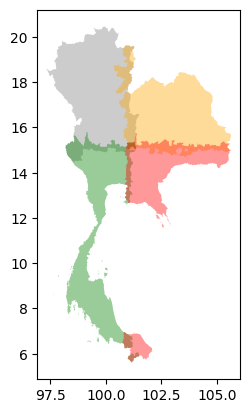

In [53]:
base=Thailand_topLeft.plot(facecolor='grey', alpha=0.4)
Thailand_topRight.plot(ax=base,facecolor='orange', alpha=0.4)
Thailand_bottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Thailand_bottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [54]:
Thailand_AirTopLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,centroidY:]
Thailand_AirTopRight=airports[airports.kind=='medium_airport'].cx[centroidX:,centroidY:]
Thailand_AirBottomLeft=airports[airports.kind=='medium_airport'].cx[:centroidX,:centroidY]
Thailand_AirBottomRight=airports[airports.kind=='medium_airport'].cx[centroidX:,:centroidY]

<Axes: >

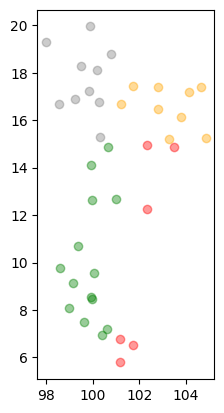

In [55]:
base=Thailand_AirTopLeft.plot(facecolor='grey', alpha=0.4)
Thailand_AirTopRight.plot(ax=base,facecolor='orange', alpha=0.4)
Thailand_AirBottomLeft.plot(ax=base,facecolor='green', alpha=0.4)
Thailand_AirBottomRight.plot(ax=base,facecolor='red', alpha=0.4)

In [56]:
Thailand_AirBottomLeft

name            kind  latitude_deg  \
4                   Samui Airport  medium_airport       9.54779   
5                   Krabi Airport  medium_airport       8.09912   
6   Hat Yai International Airport  medium_airport       6.93321   
7   U-Tapao International Airport  medium_airport      12.67990   
10            Surat Thani Airport  medium_airport       9.13260   
16               Chumphon Airport  medium_airport      10.71120   
19                Hua Hin Airport  medium_airport      12.63620   
21                  Trang Airport  medium_airport       7.50874   
33    Nakhon Si Thammarat Airport  medium_airport       8.53962   
34                 Ranong Airport  medium_airport       9.77762   
38           Khok Kathiam Airport  medium_airport      14.87460   
60               Cha Eian Airport  medium_airport       8.47115   
64               Songkhla Airport  medium_airport       7.18656   
66         Kamphaeng Saen Airport  medium_airport      14.10200   

    longitude_deg  elevation_ft                   region_name  \
4      100.061996          64.0          Surat Thani Province   
5       98.986198          82.0                Krabi Province   
6      100.392998          90.0             Songkhla Province   
7      101.004997          42.0               Rayong Province   
10      99.135597          20.0          Surat Thani Province   
16      99.361702          18.0             Chumphon Province   
19      99.951500          62.0          Phetchaburi Province   
21      99.616600          67.0                Trang Province   
33      99.944702          13.0  Nakhon Si Thammarat Province   
34      98.585503          57.0               Ranong Province   
38     100.663002         123.0              Lopburi Province   
60      99.955597          44.0  Nakhon Si Thammarat Province   
64     100.608002          12.0             Songkhla Province   
66      99.917198          30.0          Suphan Buri Province   

                 municipality                    geometry  
4   Na Thon (Ko Samui Island)   POINT (100.06525 9.54574)  
5                       Krabi    POINT (98.98931 8.09697)  
6                     Hat Yai   POINT (100.39627 6.93097)  
7                      Rayong  POINT (101.00841 12.67807)  
10                Surat Thani    POINT (99.13874 9.13053)  
16                   Chumphon   POINT (99.36488 10.70924)  
19                    Hua Hin   POINT (99.95478 12.63438)  
21                      Trang    POINT (99.61978 7.50655)  
33        Nakhon Si Thammarat    POINT (99.94793 8.53750)  
34                     Ranong    POINT (98.58858 9.77560)  
38                        NaN  POINT (100.66640 14.87295)  
60        Nakhon Si Thammarat    POINT (99.95883 8.46902)  
64                        NaN   POINT (100.61130 7.18434)  
66              Nakhon Pathom   POINT (99.92049 14.10030)

<Axes: >

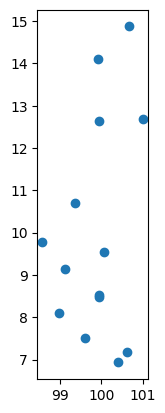

In [57]:
Thailand_AirBottomLeft.convex_hull.plot()

<Axes: >

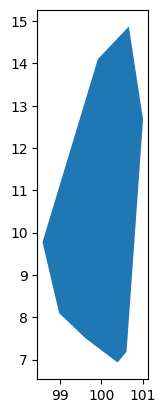

In [58]:
Thailand_AirBottomLeft.dissolve().convex_hull.plot()

In [59]:
Thailand_AirBottomLeft.dissolve().convex_hull

0    POLYGON ((100.39627 6.93097, 99.61978 7.50655,...
dtype: geometry

<Axes: >

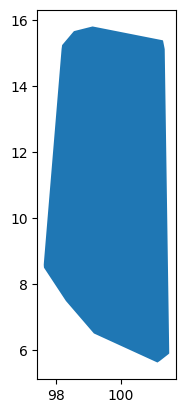

In [60]:
Thailand_bottomLeft.convex_hull.plot()

<Axes: >

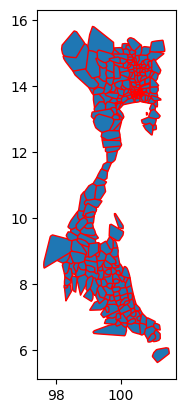

In [61]:
thailand_municipalities.cx[:centroidX,:centroidY].convex_hull.plot(edgecolor='red')

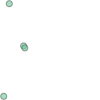

In [62]:
large_airport=airports[airports.kind=='large_airport']
large_airport.unary_union

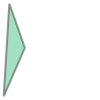

In [63]:
large_airport.unary_union.convex_hull

In [64]:
LargeAirport_hull= gpd.GeoDataFrame(index=[0],
                                    crs=large_airport.crs,
                                    geometry=[large_airport.unary_union.convex_hull])
LargeAirport_hull['name']='large airports hull' # optional

# then

LargeAirport_hull

geometry                 name
0  POLYGON ((98.31993 8.11106, 98.96585 18.76550,...  large airports hull

<Axes: >

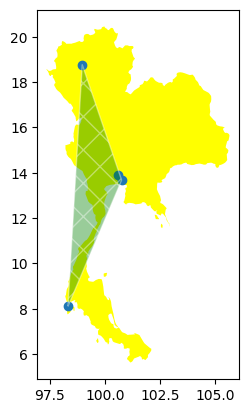

In [65]:
base=thailand.plot(facecolor='yellow')
large_airport.plot(ax=base)
LargeAirport_hull.plot(ax=base,facecolor='green',
                       edgecolor='white',alpha=0.4,
                       hatch='X')

In [66]:
# the north
MunisN_thailand=thailand_municipalities.cx[:,centroidY:]
# the south
MunisS_thailand=thailand_municipalities.cx[:,:centroidY]
# the west
MunisW_thailand=thailand_municipalities.cx[:centroidX,:]
# the east
MunisE_thailand=thailand_municipalities.cx[centroidX:,:]

In [67]:
munisMidNS_thailand=MunisN_thailand.overlay(MunisS_thailand, how="intersection",keep_geom_type=True)
munisMidNS_thailand

Shape_Leng_1  Shape_Area_1                 ADM2_EN_1        ADM2_TH_1  \
0       1.368328      0.059120              Khok Samrong         โคกสำโรง   
1       2.193531      0.094896                Chai Badan         ชัยบาดาล   
2       1.228094      0.045941                    Ban Mi         บ้านหมี่   
3       1.173653      0.033958                 Tha Luang          ท่าหลวง   
4       1.804766      0.043482                Lam Sonthi           ลำสนธิ   
5       1.670351      0.069920                    Takhli            ตาคลี   
6       2.110956      0.117308             Dan Khun Thot        ด่านขุนทด   
7       1.072994      0.023334           Mueang Chai Nat      เมืองชัยนาท   
8       0.651759      0.018548                  Sapphaya           สรรพยา   
9       1.183578      0.045299                    Hankha            หันคา   
10      0.896309      0.022534                 Noen Kham          เนินขาม   
11      4.340074      0.277186                   Ban Rai          บ้านไร่   
12      1.490787      0.064162  Mueang Nakhon Ratchasima  เมืองนครราชสีมา   
13      1.302291      0.045882                  Non Thai           โนนไทย   
14      1.611504      0.058037                  Non Sung           โนนสูง   
15      2.290110      0.075051                    Phimai            พิมาย   
16      1.587090      0.046712                 Chakkarat           จักราช   
17      1.207954      0.044767             Huai Thalaeng         ห้วยแถลง   
18      1.688775      0.054099               Chum Phuang           ชุมพวง   
19      1.542377      0.067674              Lam Plai Mat        ลำปลายมาศ   
20      1.535094      0.035806                Khu Mueang          คูเมือง   
21      1.515171      0.070105           Mueang Buri Ram   เมืองบุรีรัมย์   
22      0.640215      0.014210                   Ban Dan         บ้านด่าน   
23      1.566132      0.051733                    Satuek             สตึก   
24      2.108366      0.091592              Mueang Surin    เมืองสุรินทร์   
25      0.957956      0.027883                 Chom Phra           จอมพระ   
26      1.392745      0.061171               Sikhoraphum         ศีขรภูมิ   
27      0.710701      0.017846                     Sanom              สนม   
28      0.733352      0.015693                 Non Narai       โนนนารายณ์   
29      1.092189      0.023257              Samrong Thap         สำโรงทาบ   
30      0.945954      0.017839            Huai Thap Than       ห้วยทับทัน   
31      1.233563      0.045416          Mueang Si Sa Ket    เมืองศรีสะเกษ   
32      1.749160      0.060694               Kanthararom       กันทรารมย์   
33      1.413985      0.036868          Uthumphon Phisai     อุทุมพรพิสัย   
34      1.603665      0.052090             Warin Chamrap       วารินชำราบ   
35      2.056706      0.082362          Phibun Mangsahan    พิบูลมังสาหาร   
36      1.819459      0.065940                Sirindhorn          สิรินธร   
37      1.345695      0.020137                    Na Yia           นาเยีย   
38      3.943181      0.325584            Thong Pha Phum        ทองผาภูมิ   
39      3.525723      0.269553             Sangkhla Buri       สังขละบุรี   

   ADM2_PCODE_1 ADM2_REF_1 ADM2ALT1EN_1 ADM2ALT2EN_1 ADM2ALT1TH_1  \
0        TH1603       None         None         None         None   
1        TH1604       None         None         None         None   
2        TH1606       None         None         None         None   
3        TH1607       None         None         None         None   
4        TH1610       None         None         None         None   
5        TH6007       None         None         None         None   
6        TH3008       None         None         None         None   
7        TH1801       None         None         None         None   
8        TH1804       None         None         None         None   
9        TH1806       None         None         None         None   
10       TH1808       None         None         None         None   
11       TH6106   

In [68]:
MunisN_thailand.sjoin(MunisS_thailand, how="inner", predicate='contains')

Shape_Leng_left  Shape_Area_left              ADM2_EN_left  \
94          1.368328         0.059120              Khok Samrong   
95          2.193531         0.094896                Chai Badan   
97          1.228094         0.045941                    Ban Mi   
98          1.173653         0.033958                 Tha Luang   
101         1.804766         0.043482                Lam Sonthi   
109         1.072994         0.023334           Mueang Chai Nat   
112         0.651759         0.018548                  Sapphaya   
114         1.183578         0.045299                    Hankha   
116         0.896309         0.022534                 Noen Kham   
197         1.490787         0.064162  Mueang Nakhon Ratchasima   
202         1.587090         0.046712                 Chakkarat   
204         2.110956         0.117308             Dan Khun Thot   
205         1.302291         0.045882                  Non Thai   
206         1.611504         0.058037                  Non Sung   
211         2.290110         0.075051                    Phimai   
212         1.207954         0.044767             Huai Thalaeng   
213         1.688775         0.054099               Chum Phuang   
229         1.515171         0.070105           Mueang Buri Ram   
230         1.535094         0.035806                Khu Mueang   
238         1.542377         0.067674              Lam Plai Mat   
239         1.566132         0.051733                    Satuek   
249         0.640215         0.014210                   Ban Dan   
252         2.108366         0.091592              Mueang Surin   
255         0.957956         0.027883                 Chom Phra   
259         0.710701         0.017846                     Sanom   
260         1.392745         0.061171               Sikhoraphum   
263         1.092189         0.023257              Samrong Thap   
268         0.733352         0.015693                 Non Narai   
269         1.233563         0.045416          Mueang Si Sa Ket   
271         1.749160         0.060694               Kanthararom   
278         1.413985         0.036868          Uthumphon Phisai   
280         0.945954         0.017839            Huai Thap Than   
303         1.603665         0.052090             Warin Chamrap   
304         2.056706         0.082362          Phibun Mangsahan   
309         1.819459         0.065940                Sirindhorn   
311         1.345695         0.020137                    Na Yia   
637         1.670351         0.069920                    Takhli   
651         4.340074         0.277186                   Ban Rai   
731         3.943181         0.325584            Thong Pha Phum   
732         3.525723         0.269553             Sangkhla Buri   

        ADM2_TH_left ADM2_PCODE_left ADM2_REF_left ADM2ALT1EN_left  \
94          โคกสำโรง          TH1603          None            None   
95          ชัยบาดาล          TH1604          None            None   
97          บ้านหมี่          TH1606          None            None   
98           ท่าหลวง          TH1607          None            None   
101           ลำสนธิ          TH1610          None            None   
109      เมืองชัยนาท          TH1801          None            None   
112           สรรพยา          TH1804          None            None   
114            หันคา          TH1806          None            None   
116          เนินขาม          TH1808          None            None   
197  เมืองนครราชสีมา          TH3001          None            None   
202           จักราช          TH3006          None            None   
204        ด่านขุนทด          TH3008          None            None   
205           โนนไทย          TH3009          None            None   
206           โนนสูง          TH3010          None            None   
211            พิมาย          TH3015          None            None   
212         ห้วยแถลง          TH3016          None            None   
213           ชุมพวง          TH3017          None            None 

<Axes: >

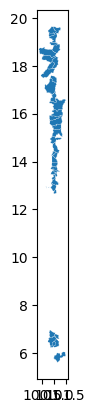

In [69]:
munisMidWE_thailand=MunisW_thailand.overlay(MunisE_thailand, how="intersection",keep_geom_type=True)
munisMidWE_thailand.plot(edgecolor='white',linewidth=0.1)

In [70]:
munisMidNS_thailand.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Shape_Leng_1  40 non-null     float64 
 1   Shape_Area_1  40 non-null     float64 
 2   ADM2_EN_1     40 non-null     object  
 3   ADM2_TH_1     40 non-null     object  
 4   ADM2_PCODE_1  40 non-null     object  
 5   ADM2_REF_1    0 non-null      object  
 6   ADM2ALT1EN_1  0 non-null      object  
 7   ADM2ALT2EN_1  0 non-null      object  
 8   ADM2ALT1TH_1  0 non-null      object  
 9   ADM2ALT2TH_1  0 non-null      object  
 10  ADM1_EN_1     40 non-null     object  
 11  ADM1_TH_1     40 non-null     object  
 12  ADM1_PCODE_1  40 non-null     object  
 13  ADM0_EN_1     40 non-null     object  
 14  ADM0_TH_1     40 non-null     object  
 15  ADM0_PCODE_1  40 non-null     object  
 16  date_1        40 non-null     object  
 17  validOn_1     40 non-null     object  
 18  vali

In [71]:
munisMidWE_thailand.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 39 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Shape_Leng_1  40 non-null     float64 
 1   Shape_Area_1  40 non-null     float64 
 2   ADM2_EN_1     40 non-null     object  
 3   ADM2_TH_1     40 non-null     object  
 4   ADM2_PCODE_1  40 non-null     object  
 5   ADM2_REF_1    0 non-null      object  
 6   ADM2ALT1EN_1  0 non-null      object  
 7   ADM2ALT2EN_1  0 non-null      object  
 8   ADM2ALT1TH_1  0 non-null      object  
 9   ADM2ALT2TH_1  0 non-null      object  
 10  ADM1_EN_1     40 non-null     object  
 11  ADM1_TH_1     40 non-null     object  
 12  ADM1_PCODE_1  40 non-null     object  
 13  ADM0_EN_1     40 non-null     object  
 14  ADM0_TH_1     40 non-null     object  
 15  ADM0_PCODE_1  40 non-null     object  
 16  date_1        40 non-null     object  
 17  validOn_1     40 non-null     object  
 18  vali

In [73]:
keep=['ADM0_TH_1','ADM1_TH_1','ADM2_TH_1','geometry']
munisMidNS_thailand=munisMidNS_thailand.loc[:,keep]
munisMidWE_thailand=munisMidWE_thailand.loc[:,keep]


In [74]:
munisMidNS_thailand.overlay(munisMidWE_thailand,how="union",keep_geom_type=True)

ADM0_TH_1_1 ADM1_TH_1_1 ADM2_TH_1_1 ADM0_TH_1_2 ADM1_TH_1_2 ADM2_TH_1_2  \
0    ประเทศไทย      ลพบุรี    ชัยบาดาล   ประเทศไทย      ลพบุรี    ชัยบาดาล   
1    ประเทศไทย      ลพบุรี    โคกสำโรง         NaN         NaN         NaN   
2    ประเทศไทย      ลพบุรี    บ้านหมี่         NaN         NaN         NaN   
3    ประเทศไทย      ลพบุรี     ท่าหลวง         NaN         NaN         NaN   
4    ประเทศไทย      ลพบุรี      ลำสนธิ         NaN         NaN         NaN   
..         ...         ...         ...         ...         ...         ...   
74         NaN         NaN         NaN   ประเทศไทย       สงขลา   สะบ้าย้อย   
75         NaN         NaN         NaN   ประเทศไทย     ปัตตานี    โคกโพธิ์   
76         NaN         NaN         NaN   ประเทศไทย        ยะลา        ยะหา   
77         NaN         NaN         NaN   ประเทศไทย        ยะลา       กาบัง   
78         NaN         NaN         NaN   ประเทศไทย        ยะลา        เบตง   

                                             geometry  
0   POLYGON ((101.29851 15.37977, 101.29857 15.379...  
1   POLYGON ((100.74503 15.18678, 100.74509 15.186...  
2   POLYGON ((100.59176 15.24722, 100.59206 15.247...  
3   POLYGON ((101.18873 15.16723, 101.18887 15.167...  
4   POLYGON ((101.34873 15.75254, 101.34901 15.752...  
..                                                ...  
74  POLYGON ((100.96623 6.70877, 100.96629 6.70877...  
75  POLYGON ((101.06183 6.79660, 101.06297 6.79671...  
76  POLYGON ((101.13116 6.55256, 101.13429 6.55203...  
77  POLYGON ((101.02383 6.48201, 101.02436 6.48206...  
78  POLYGON ((101.41019 6.05427, 101.41094 6.05437...  

[79 rows x 7 columns]

In [75]:
pd.concat([munisMidNS_thailand,munisMidWE_thailand],ignore_index=True)

ADM0_TH_1 ADM1_TH_1  ADM2_TH_1  \
0   ประเทศไทย    ลพบุรี   โคกสำโรง   
1   ประเทศไทย    ลพบุรี   ชัยบาดาล   
2   ประเทศไทย    ลพบุรี   บ้านหมี่   
3   ประเทศไทย    ลพบุรี    ท่าหลวง   
4   ประเทศไทย    ลพบุรี     ลำสนธิ   
..        ...       ...        ...   
75  ประเทศไทย     สงขลา  สะบ้าย้อย   
76  ประเทศไทย   ปัตตานี   โคกโพธิ์   
77  ประเทศไทย      ยะลา       ยะหา   
78  ประเทศไทย      ยะลา      กาบัง   
79  ประเทศไทย      ยะลา       เบตง   

                                             geometry  
0   POLYGON ((100.74494 15.18698, 100.74500 15.186...  
1   POLYGON ((101.29842 15.37977, 101.29851 15.379...  
2   POLYGON ((100.59176 15.24722, 100.59206 15.247...  
3   POLYGON ((101.18856 15.16721, 101.18862 15.167...  
4   POLYGON ((101.34570 15.75224, 101.34663 15.752...  
..                                                ...  
75  POLYGON ((100.96623 6.70877, 100.96629 6.70877...  
76  POLYGON ((101.06183 6.79660, 101.06297 6.79671...  
77  POLYGON ((101.13116 6.55256, 101.13429 6.55203...  
78  POLYGON ((101.02383 6.48201, 101.02436 6.48206...  
79  POLYGON ((101.41019 6.05427, 101.41094 6.05437...  

[80 rows x 4 columns]

<Axes: >

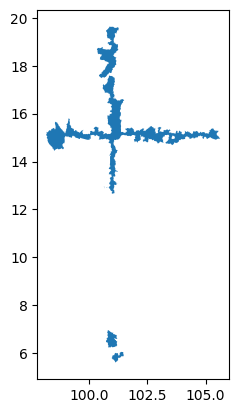

In [76]:
munisMidNS_thailand.dissolve().overlay(munisMidWE_thailand.dissolve(), how="union",keep_geom_type=True).dissolve().plot()

In [77]:
muniMidThailand=munisMidNS_thailand.dissolve().overlay(munisMidWE_thailand.dissolve(), how="union",keep_geom_type=True).dissolve()
muniMidThailand

geometry ADM0_TH_1_1 ADM1_TH_1_1  \
0  MULTIPOLYGON (((100.67094 12.86789, 100.67082 ...   ประเทศไทย      ลพบุรี   

  ADM2_TH_1_1 ADM0_TH_1_2 ADM1_TH_1_2      ADM2_TH_1_2  
0    โคกสำโรง   ประเทศไทย  ฉะเชิงเทรา  เมืองฉะเชิงเทรา

In [88]:
muniMidThailand['zone']='middles'
muniMidThailand=muniMidThailand.loc[:,['ADM0_TH_1_1','zone','geometry']]
muniMidThailand

ADM0_TH_1_1     zone                                           geometry
0   ประเทศไทย  middles  MULTIPOLYGON (((100.67094 12.86789, 100.67082 ...

<Axes: >

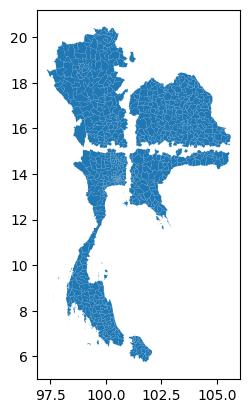

In [89]:
thailand_municipalities.overlay(muniMidThailand, how='difference').plot()

<Axes: >

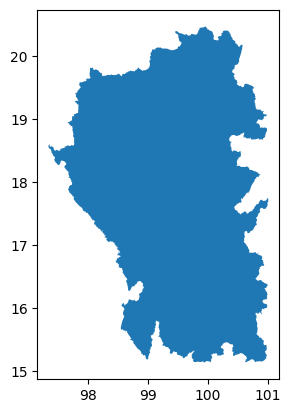

In [90]:
Thailand_topLeft.overlay(muniMidThailand, how='difference').plot()

<Axes: >

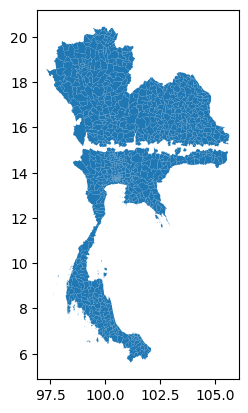

In [91]:
MunisN_thailand.overlay(MunisS_thailand, how="symmetric_difference",keep_geom_type=False).plot()

<Axes: >

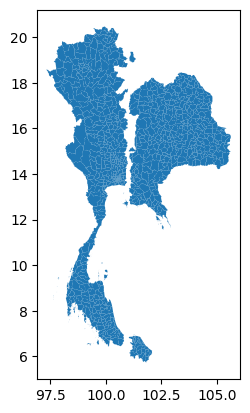

In [92]:
MunisW_thailand.overlay(MunisE_thailand, how="symmetric_difference",keep_geom_type=False).plot()

In [93]:
Thailand_AirTopLeft_hull=Thailand_AirTopLeft.dissolve().convex_hull
Thailand_AirTopRight_hull=Thailand_AirTopRight.dissolve().convex_hull
Thailand_AirBottomLeft_hull=Thailand_AirBottomLeft.dissolve().convex_hull
Thailand_AirBottomRight_hull=Thailand_AirBottomRight.dissolve().convex_hull

<Axes: >

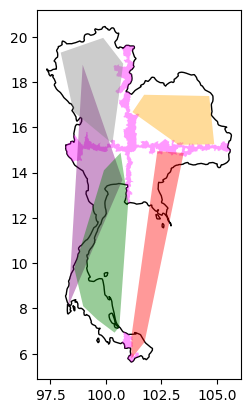

In [94]:
base = thailand.plot(color='white', edgecolor='black') 
muniMidThailand.plot(ax=base,facecolor='magenta',alpha=0.4) 
LargeAirport_hull.plot(ax=base,facecolor='purple',alpha=0.4)
Thailand_AirTopLeft_hull.plot(ax=base,facecolor='grey', alpha=0.4)
Thailand_AirTopRight_hull.plot(ax=base,facecolor='orange', alpha=0.4)
Thailand_AirBottomLeft_hull.plot(ax=base,facecolor='green', alpha=0.4)
Thailand_AirBottomRight_hull.plot(ax=base,facecolor='red', alpha=0.4)

In [95]:
thailand_municipalities[~thailand_municipalities.is_valid]

Empty GeoDataFrame
Columns: [Shape_Leng, Shape_Area, ADM2_EN, ADM2_TH, ADM2_PCODE, ADM2_REF, ADM2ALT1EN, ADM2ALT2EN, ADM2ALT1TH, ADM2ALT2TH, ADM1_EN, ADM1_TH, ADM1_PCODE, ADM0_EN, ADM0_TH, ADM0_PCODE, date, validOn, validTo, geometry]
Index: []

ValueError: aspect must be finite and positive 

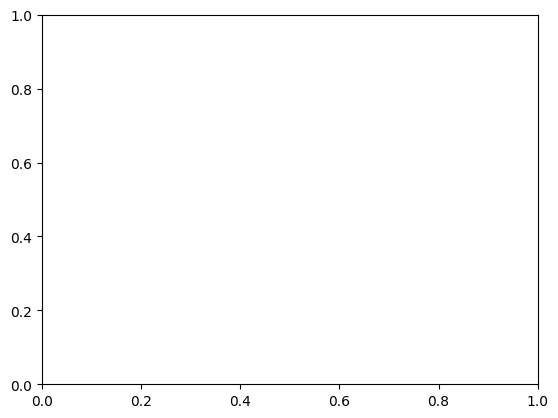

In [97]:
thailand_municipalities[~thailand_municipalities.is_valid].plot()

In [98]:
from shapely.validation import explain_validity, make_valid

explain_validity(thailand_municipalities[~thailand_municipalities.is_valid].geometry)

GeoSeries([], Name: geometry, dtype: geometry)

In [99]:
thailand_municipalities['validity']=[x.split('[')[0] for x in thailand_municipalities.geometry.apply(lambda x: explain_validity(x))]
thailand_municipalities['validity'].value_counts()

validity
Valid Geometry    928
Name: count, dtype: int64

In [100]:
thailand_municipalities.drop(columns=['validity'],inplace=True)

thailand_municipalities_valid=thailand_municipalities.copy()

thailand_municipalities_valid['geometry'] = [make_valid(row)  if not row.is_valid else row for row in thailand_municipalities_valid['geometry'] ]
#any invalid?
thailand_municipalities_valid[~thailand_municipalities_valid.is_valid]

Empty GeoDataFrame
Columns: [Shape_Leng, Shape_Area, ADM2_EN, ADM2_TH, ADM2_PCODE, ADM2_REF, ADM2ALT1EN, ADM2ALT2EN, ADM2ALT1TH, ADM2ALT2TH, ADM1_EN, ADM1_TH, ADM1_PCODE, ADM0_EN, ADM0_TH, ADM0_PCODE, date, validOn, validTo, geometry]
Index: []

In [101]:
[x for x in thailand_municipalities_valid["geometry"]]

[<POLYGON ((100.501 13.741, 100.5 13.739, 100.5 13.739, 100.499 13.739, 100.4...>,
 <POLYGON ((100.52 13.8, 100.521 13.8, 100.521 13.8, 100.522 13.8, 100.522 13...>,
 <POLYGON ((100.914 13.946, 100.914 13.946, 100.914 13.946, 100.914 13.945, 1...>,
 <POLYGON ((100.517 13.718, 100.517 13.718, 100.517 13.718, 100.517 13.718, 1...>,
 <POLYGON ((100.61 13.891, 100.61 13.891, 100.61 13.891, 100.61 13.89, 100.61...>,
 <POLYGON ((100.629 13.819, 100.629 13.819, 100.63 13.819, 100.63 13.819, 100...>,
 <POLYGON ((100.519 13.753, 100.519 13.753, 100.519 13.753, 100.519 13.753, 1...>,
 <POLYGON ((100.516 13.739, 100.516 13.738, 100.515 13.738, 100.515 13.738, 1...>,
 <POLYGON ((100.616 13.706, 100.616 13.706, 100.616 13.706, 100.616 13.706, 1...>,
 <POLYGON ((100.802 13.843, 100.802 13.843, 100.802 13.843, 100.803 13.843, 1...>,
 <POLYGON ((100.799 13.782, 100.799 13.782, 100.8 13.782, 100.8 13.782, 100.8...>,
 <POLYGON ((100.552 13.718, 100.552 13.718, 100.552 13.718, 100.552 13.718, 1...>,
 <PO

In [102]:
pd.Series([type(x) for x in thailand_municipalities_valid.geometry]).value_counts()

<class 'shapely.geometry.polygon.Polygon'>              878
<class 'shapely.geometry.multipolygon.MultiPolygon'>     50
Name: count, dtype: int64

In [ ]:
# JUAN DIEGO POZO ORTIZ    20210679 